#Task 1: Define the Problem

Analyze a food truck dataset by creating a Linear Regression model.

#Task 2a: Install the Needed Libraries

In [1]:
#pass

#Task 2b: Import the Needed Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#Task 3: Load the Data

In [3]:
food_df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/food_truck_data.txt')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [4]:
food_df.head(2)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302


##Get Data Info

In [5]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


##Find Missing Values

In [6]:
food_df.isnull().sum()

Population    0
Profit        0
dtype: int64

There are no missing/null values. 

#Task 5: Perform Data Cleaning

In [7]:
food_df.columns

Index(['Population', 'Profit'], dtype='object')

The dataset is fairly small and clean, so there is not much data cleaning that needs to be done. 

#Task 6: Visualize Cleaned up Dataset

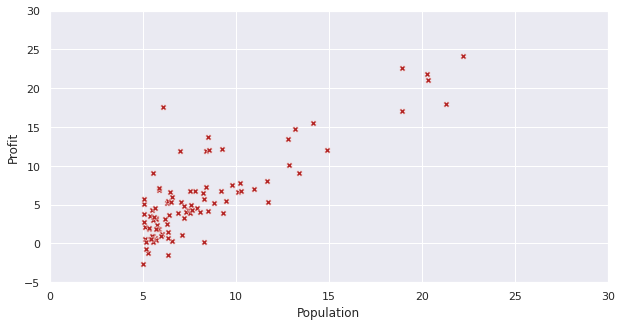

In [8]:
#Let's see how population and profit are related
sns.set_style("dark")
sns.set(rc={'figure.figsize': (10,5)})
sns.scatterplot(data = food_df, x = 'Population', y = 'Profit', color = "firebrick", marker = 'X')
plt.xlim(0,30)
plt.ylim(-5, 30)
plt.show()

There seems to be a positive correlation between Population and Profit.

#Task 7: Conceptualize the problem

Now that there is a clear correlation between these two variables, we can create a Linear Regression model to represnt the data and use it to find projected profit amount based on population size.

#Task 8: Perform Data-Split

In [9]:
#Our x will be population
X = food_df[['Population']]
#Our Y will be profit
Y = food_df[['Profit']]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

#Task 9: Choose the ML Method to follow

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linreg = LinearRegression()

#Task 10: Train the ML Model

In [14]:
linreg.fit(X_train,Y_train)

LinearRegression()

#Task 11: Test the Model

In [15]:
print(linreg.intercept_)

[-3.56221284]


In [16]:
print(linreg.coef_)

[[1.19943264]]


Our Linear Regression formula is : **y = 1.20347702x - 3.72225924**

In [17]:
Y_pred = linreg.predict(X_test)
print(Y_pred)

[[ 3.20222742]
 [ 3.16216637]
 [20.75028677]
 [19.17783058]
 [ 4.29155214]
 [ 2.80401578]
 [ 8.7607581 ]
 [19.16103853]
 [ 6.14827387]
 [ 8.15468479]
 [10.47114905]
 [ 6.38516182]
 [ 4.91873547]
 [ 3.36295139]
 [21.96051431]
 [ 7.02325998]
 [ 2.66092347]
 [ 6.38720085]
 [ 2.65000863]
 [ 4.07265569]
 [ 4.14965926]
 [ 3.39617568]
 [ 3.28378884]
 [ 4.06485937]
 [ 9.5799706 ]]


In [18]:
print('Actual Values', Y_test.values[0:10])

Actual Values [[ 4.6042 ]
 [ 3.3928 ]
 [21.767  ]
 [17.054  ]
 [ 0.29678]
 [ 1.8396 ]
 [ 6.7526 ]
 [22.638  ]
 [ 4.1164 ]
 [ 7.5435 ]]


In [19]:
print('Rredicted Values', Y_pred[0:10])

Rredicted Values [[ 3.20222742]
 [ 3.16216637]
 [20.75028677]
 [19.17783058]
 [ 4.29155214]
 [ 2.80401578]
 [ 8.7607581 ]
 [19.16103853]
 [ 6.14827387]
 [ 8.15468479]]


In [20]:
#Let's test the model predictive accuracy
from sklearn import metrics

In [21]:
mse = metrics.mean_squared_error(Y_test, Y_pred)

In [22]:
np.sqrt(mse)

2.619820424504995

The model represents the dataset fairly well (but could be better). Let's see this visually:

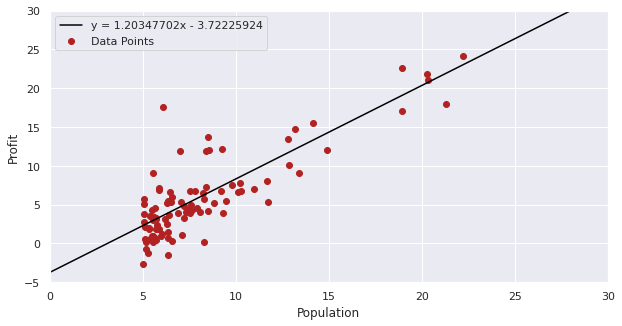

In [23]:
xx = np.arange(-5,30)
yy = 1.20347702*xx - 3.72225924
plt.scatter(X,Y, color = "firebrick")
plt.plot(xx, yy, color = 'black')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.legend(['y = 1.20347702x - 3.72225924', 'Data Points'])
plt.xlim(0,30)
plt.ylim(-5, 30)
plt.show()